In [1]:
%%file latch.py

import numpy as np
import matplotlib.pyplot as plt

import pyNN.hardware.spikey as pynn

pynn.setup(mappingOffset=0, calibSynDrivers=False)

spike_train_exc = np.array([100.0, 700.0])
spike_train_inh = np.array([500.0, 800.0])

stim_exc = pynn.Population( 5, pynn.SpikeSourceArray, {'spike_times': spike_train_exc})
stim_inh = pynn.Population(10, pynn.SpikeSourceArray, {'spike_times': spike_train_inh})

neurons = pynn.Population(5, pynn.IF_facets_hardware1)

neurons.record()

proj_exc = pynn.Projection(
    stim_exc,
    neurons,
    pynn.AllToAllConnector(weights=15*pynn.minExcWeight()),
    target="excitatory"
)

proj_inh = pynn.Projection(
    stim_inh,
    neurons,
    pynn.AllToAllConnector(weights=15*pynn.minInhWeight()),
    target="inhibitory"
)

proj_recurrent = pynn.Projection(
    neurons,
    neurons,
    pynn.FixedProbabilityConnector(0.8, weights=9*pynn.minExcWeight()),
    target="excitatory"
)

pynn.run(1000.0)

spikes = neurons.getSpikes()

pynn.end()

fig = plt.figure(figsize=(12, 6))
ax = fig.gca()

for nrn in np.unique(spikes[:,0]):
    mask = (spikes[:,0] == nrn)
    spike_times = spikes[mask,1]
    ax.plot(spike_times, np.ones_like(spike_times) * nrn, "|", ms=5)

ax.set_xlabel(r"time [\si{\milli\second}]")
ax.set_ylabel(r"neuron index")

ax.set_yticks(np.arange(0, 5, 1))

fig.savefig("latch.png")

Overwriting latch.py


In [2]:
! srun --gres=station548 python latch.py

/wang/environment/software/jessie/spikey/github_20170208/lib/python2.7/site-packages/pyNN/random.py:25: UserWarning: GSL random number generators not available
  warnings.warn("GSL random number generators not available")
INFO  HAL.Ctr Retrieved station548 from environment variable MY_STAGE1_STATION
INFO  HAL.Ctr Config successfully loaded from file /wang/environment/software/jessie/spikey/github_20170208/spikeyhal/config/station548.cfg
INFO  HAL.Ctr Opening FPGA board with serial B291670
INFO  PyN.wks Using station station548
INFO  HAL.Spi Found Spikey 5.
INFO  PyN.cfg Calibrations NeuronMems Icb excSynDrivers inhSynDrivers bioDynrange NOT loaded!
INFO  HAL.PyS Hardware config written (enable loglevel 3 to list parameter names)
WARN  HAL.Cal vout#37 set to 0.02 but valid range is: 0.1294 - 1.704
WARN  HAL.Cal vout#38 set to 0.02 but valid range is: 0.1089 - 1.702
WARN  HAL.Cal vout#12 set to 0.02 but valid range is: 0.08883 - 1.69
WARN  HAL.Cal vout#13 set to 0.02 but valid range is: 

In [3]:
from IPython.display import Image

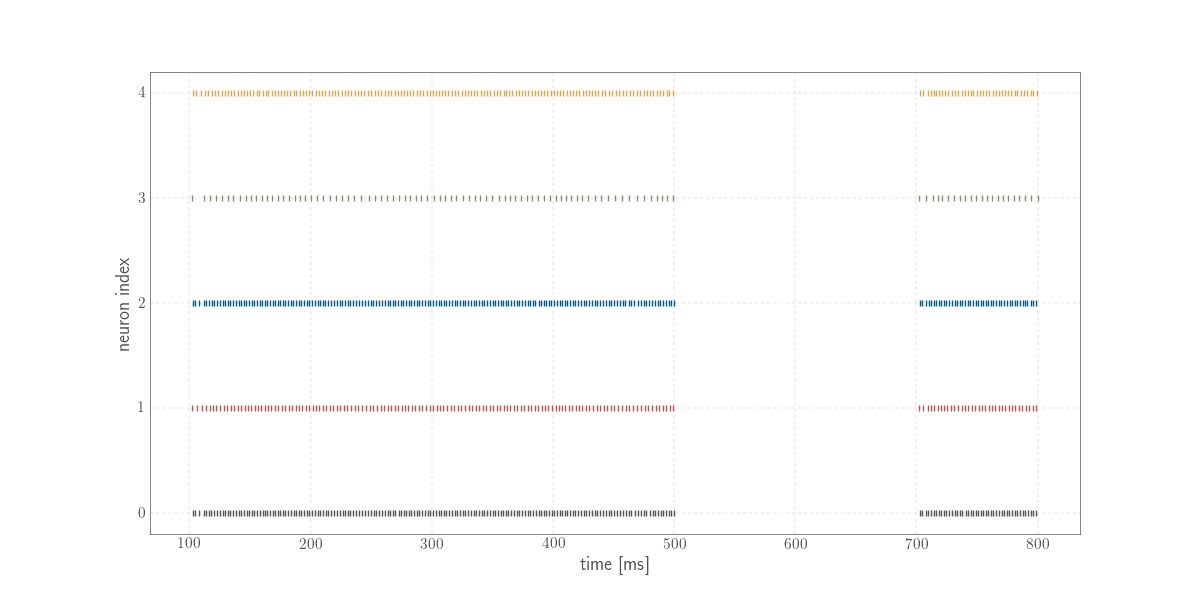

In [4]:
Image(filename="latch.png")